Epoch: 0050 cost= 0.080667555 W= 0.28369 b= 0.556179
Epoch: 0100 cost= 0.080240339 W= 0.281662 b= 0.570768
Epoch: 0150 cost= 0.079862610 W= 0.279755 b= 0.58449
Epoch: 0200 cost= 0.079528630 W= 0.277961 b= 0.597395
Epoch: 0250 cost= 0.079233348 W= 0.276273 b= 0.609533
Epoch: 0300 cost= 0.078972302 W= 0.274687 b= 0.620948
Epoch: 0350 cost= 0.078741536 W= 0.273195 b= 0.631683
Epoch: 0400 cost= 0.078537516 W= 0.271791 b= 0.64178
Epoch: 0450 cost= 0.078357182 W= 0.270471 b= 0.651275
Epoch: 0500 cost= 0.078197762 W= 0.269229 b= 0.660207
Epoch: 0550 cost= 0.078056820 W= 0.268062 b= 0.668608
Epoch: 0600 cost= 0.077932246 W= 0.266963 b= 0.67651
Epoch: 0650 cost= 0.077822141 W= 0.26593 b= 0.683941
Epoch: 0700 cost= 0.077724814 W= 0.264959 b= 0.690932
Epoch: 0750 cost= 0.077638820 W= 0.264045 b= 0.697505
Epoch: 0800 cost= 0.077562816 W= 0.263185 b= 0.703689
Epoch: 0850 cost= 0.077495687 W= 0.262377 b= 0.709504
Epoch: 0900 cost= 0.077436320 W= 0.261617 b= 0.714973
Epoch: 0950 cost= 0.077383891 W= 

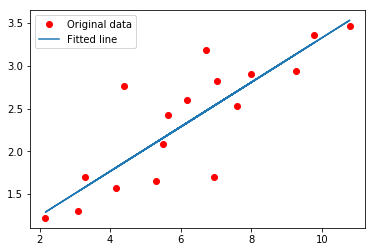

Testing... (Mean square loss Comparison)
Testing cost= 0.0773874
Absolute mean square loss difference: 4.98369e-05


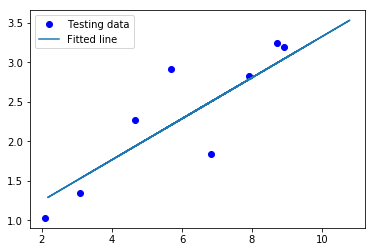

In [4]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50


train_x = numpy.linspace(0,10,10000)
train_y = 2*train_x + 5

n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()